Import basic tools and Dance Object, used for turning joint-position data into a dataframe of features

In [2]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../../")
from DanceProj1.DanceObj import Dance

import matplotlib.pyplot as plt
import seaborn as sns

Use Dance class obj on data and make feature-dataframe. See data_proc.py for details.

In [3]:
from DanceProj1.data_proc import get_data

aistpath = '../../aist_keypoints' #path to 3d keypoints data
dataBM, dataFM = get_data(aistpath)    #get data. Comes with joint-position-frame arrays and an id

Make sure data is loaded

In [4]:
print('data is dict with keys = genres', dataBM.keys())
print('values are tuples (pairs) = (posdata, id)')
print('first break piece data shape (frames, joints, xyz):', dataBM['Break'][0][0].shape)
print('id of first break piece: ', dataBM['Break'][0][1])

data is dict with keys = genres dict_keys(['Break', 'Pop', 'Lock', 'Midhop', 'LAhop', 'House', 'Waack', 'Krump', 'Street Jazz', 'Ballet Jazz'])
values are tuples (pairs) = (posdata, id)
first break piece data shape (frames, joints, xyz): (15, 576, 3)
id of first break piece:  gBR_sBM_cAll_d06_mBR2_ch06


Turn the data into Dance objects. This is a class that has methods for computing features. See DanceObj.py for details - it is contained in data_to_features.

The variable "sparse" sets whether all of the features in DanceObj are pulled as data (sparse=False), or only a selected subset of the features (sparse=True) 

In [5]:
from DanceProj1.data_proc import data_to_features

dfBM, dfFM = data_to_features(dataBM, dataFM)

there were index errors on 0 dances


In [7]:
print('There are', len(dfFM.index), 'Advanced sequences and', len(dfBM.index), 'Basic sequences')

There are 199 Advanced sequences and 1199 Basic sequences


Check the dataframes

In [8]:
print('There are', len(dfBM.columns)-2, 'features, plus the genre and id columns')
dfBM.head()

There are 17 features, plus the genre and id columns


,id,Genre,sacrumstd,sacrumjerkmag,sacrumjerky,angularmomentumxz,angularmomentumy,angularmomentumxzstd,angularmomentumystd,ypeaks,xzpeaks,wristacceleration,wristaccstd,ankleacceleration,ankleaccstd,ankleheight,ankleheightstd,Expandedness,Expandedness_std
0,gBR_sBM_cAll_d06_mBR2_ch06,Break,14.145455,988.368302,-3.415441,1764.432560,-618.888765,6775.351853,1916.049954,0.032986,0.026042,577.062396,321.902124,306.528717,145.223294,50.409131,9.937611,1050.610493,35.143258
1,gBR_sBM_cAll_d04_mBR2_ch06,Break,15.983221,1150.234258,-7.217476,1504.344550,-276.379852,7243.169927,1674.800526,0.029514,0.031250,660.713567,342.688450,319.191252,176.056154,48.841211,10.490254,1170.903477,57.259686
2,gBR_sBM_cAll_d05_mBR5_ch09,Break,6.312438,1082.892825,25.867468,-1034.170972,3766.085956,1761.532953,2499.433513,0.024831,0.031603,471.557122,243.696362,247.145298,199.194296,42.056832,3.505764,982.652655,63.517857
3,gBR_sBM_cAll_d05_mBR1_ch09,Break,9.669063,1297.120252,13.911911,-2168.281410,2733.834605,2467.617553,2203.602535,0.017188,0.029687,365.174056,253.215261,253.246271,174.006866,45.881380,8.925470,1005.866625,59.353710
4,gBR_sBM_cAll_d04_mBR0_ch08,Break,9.910966,1024.234468,-38.260091,1286.687021,-122.501652,4340.665653,5860.638728,0.027778,0.036111,362.701724,231.948540,244.393510,206.780335,46.633432,6.424277,1038.175903,98.493982


In [9]:
#scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfFM_scaled = pd.DataFrame(scaler.fit_transform(dfFM.drop(['Genre', 'id'], axis=1)), columns=dfFM.drop(['Genre', 'id'], axis=1).columns)
dfBM_scaled = pd.DataFrame(scaler.fit_transform(dfBM.drop(['Genre', 'id'], axis=1)), columns=dfBM.drop(['Genre', 'id'], axis=1).columns)

dfFM_scaled['Genre'] = dfFM['Genre']
dfBM_scaled['Genre'] = dfBM['Genre']

features = dfFM_scaled.columns.drop('Genre')
genres = dfFM['Genre'].unique()


In [10]:
dfFM_scaled.head()

,sacrumstd,sacrumjerkmag,sacrumjerky,angularmomentumxz,angularmomentumy,angularmomentumxzstd,angularmomentumystd,ypeaks,xzpeaks,wristacceleration,wristaccstd,ankleacceleration,ankleaccstd,ankleheight,ankleheightstd,Expandedness,Expandedness_std,Genre
0,0.003795,0.713917,-0.084789,-0.584464,1.692504,0.432021,0.586774,1.261536,0.362586,0.529937,0.138761,0.721439,0.114426,0.245286,0.034895,0.095588,0.307366,Break
1,2.585109,3.007362,-0.753080,0.976733,0.244447,4.546478,6.749071,0.844324,0.963170,1.852703,1.787913,4.499856,4.233049,4.342059,4.921832,1.124879,0.865624,Break
2,0.370653,0.637331,0.611088,-0.110146,0.459061,0.660904,0.539240,0.632504,0.545520,0.919318,0.086196,0.286747,0.008133,1.579007,-0.272471,0.230916,-0.006946,Break
3,-0.366817,1.242414,-0.288916,0.328997,1.507336,0.093612,0.420126,0.727369,0.555427,0.743799,0.149738,0.820879,0.499395,-0.258036,-0.249351,0.961209,0.199837,Break
4,-0.231958,1.442530,-0.621055,-1.420997,1.104173,1.099030,1.302600,0.749794,0.668433,1.621241,0.745819,1.829354,1.029125,1.010442,0.190844,1.312218,0.322649,Break


In [11]:
# group by genre
dfA_genregrouped = dfFM_scaled.groupby('Genre')

# create separate dataframes for each genre
dfABJazz_scaled = dfA_genregrouped.get_group('Ballet Jazz').drop(['Genre'], axis=1)
dfABreak_scaled = dfA_genregrouped.get_group('Break').drop(['Genre'], axis=1)
dfAPop_scaled = dfA_genregrouped.get_group('Pop').drop(['Genre'], axis=1)
dfALock_scaled = dfA_genregrouped.get_group('Lock').drop(['Genre'], axis=1)
dfAMidhop_scaled = dfA_genregrouped.get_group('Midhop').drop(['Genre'], axis=1)
dfALAhop_scaled = dfA_genregrouped.get_group('LAhop').drop(['Genre'], axis=1)
dfAHouse_scaled = dfA_genregrouped.get_group('House').drop(['Genre'], axis=1)
dfAWaack_scaled = dfA_genregrouped.get_group('Waack').drop(['Genre'], axis=1)
dfAKrump_scaled = dfA_genregrouped.get_group('Krump').drop(['Genre'], axis=1)
dfASJazz_scaled = dfA_genregrouped.get_group('Street Jazz').drop(['Genre'], axis=1)



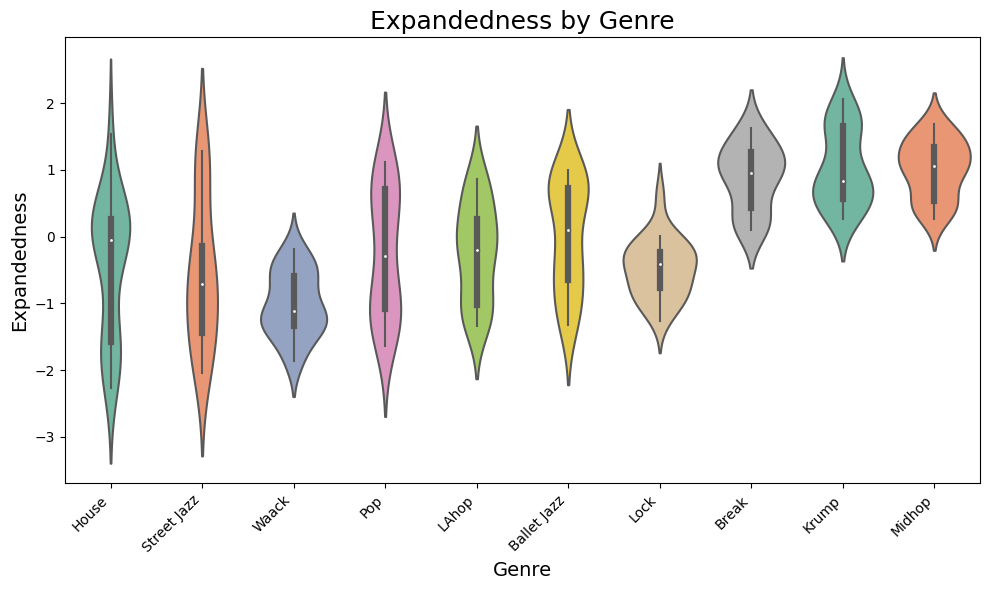

In [12]:
#Violion plot of Expandedness on y axis, dance genre on X axis, ordered by expandedness
plt.figure(figsize=(10, 6))
colors = sns.color_palette('Set2', n_colors=10)
sns.violinplot(data=dfFM_scaled.sort_values(by='Expandedness'), x='Genre', y='Expandedness', palette=colors)
plt.title('Expandedness by Genre', fontsize=18)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Expandedness', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig('../plots/feature_plots/Expandednessviolin.png')
plt.show()

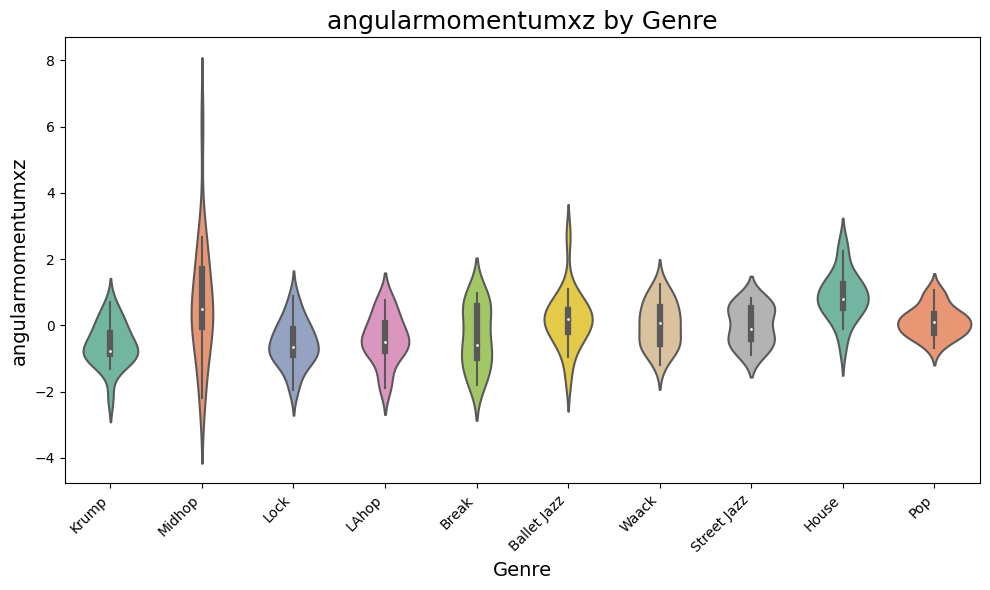

Index(['sacrumstd', 'sacrumjerkmag', 'sacrumjerky', 'angularmomentumxz',
       'angularmomentumy', 'angularmomentumxzstd', 'angularmomentumystd',
       'ypeaks', 'xzpeaks', 'wristacceleration', 'wristaccstd',
       'ankleacceleration', 'ankleaccstd', 'ankleheight', 'ankleheightstd',
       'Expandedness', 'Expandedness_std', 'Genre'],
      dtype='object')

In [14]:
#Violion plot of angularmomentumxz on y axis, dance genre on X axis, ordered by angularmomentumxz
plt.figure(figsize=(10, 6))
colors = sns.color_palette('Set2', n_colors=10)
sns.violinplot(data=dfFM_scaled.sort_values(by='angularmomentumxz'), x='Genre', y='angularmomentumxz', palette=colors)
plt.title('angularmomentumxz by Genre', fontsize=18)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('angularmomentumxz', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig('../plots/feature_plots/angularmomentumxzviolin.png')
plt.show()
dfFM_scaled.columns

In [13]:
#make df of features by genre
features = dfFM_scaled.columns.drop('Genre')
featuresdf = pd.DataFrame(columns=dfFM_scaled['Genre'].unique(), index=features)
#remove genre row

for i, feature in enumerate(features):
    for genre in dfFM_scaled['Genre'].unique():
        featuresdf.iloc[i][genre] = dfFM_scaled[feature][dfFM_scaled['Genre']==genre].mean()

# z scale columns of featuresdf
featuresdf_norm = featuresdf.to_numpy()

featuresdf_norm = pd.DataFrame(featuresdf_norm, columns=featuresdf.columns, index=featuresdf.index)
featuresdf_norm.head()

,Break,Pop,Lock,Midhop,LAhop,House,Waack,Krump,Street Jazz,Ballet Jazz
sacrumstd,0.199033,-0.361071,-0.51758,-0.15296,-0.524207,0.104635,-0.221281,-0.674432,-0.219798,2.452774
sacrumjerkmag,1.208798,-1.384713,0.001889,1.076071,-0.382676,0.644818,-0.842789,0.537642,-0.785205,-0.104184
sacrumjerky,0.138279,0.354042,0.313269,-0.52211,-0.060426,-1.161388,0.359338,-0.008373,0.194571,0.514678
angularmomentumxz,-0.352938,0.12128,-0.550309,0.66324,-0.417703,0.883142,0.012872,-0.583,-0.007486,0.177069
angularmomentumy,1.402697,-0.392985,0.067795,0.698466,-0.059931,-0.136716,-0.479083,0.159156,-0.923221,-0.300695


<function matplotlib.pyplot.show(close=None, block=None)>

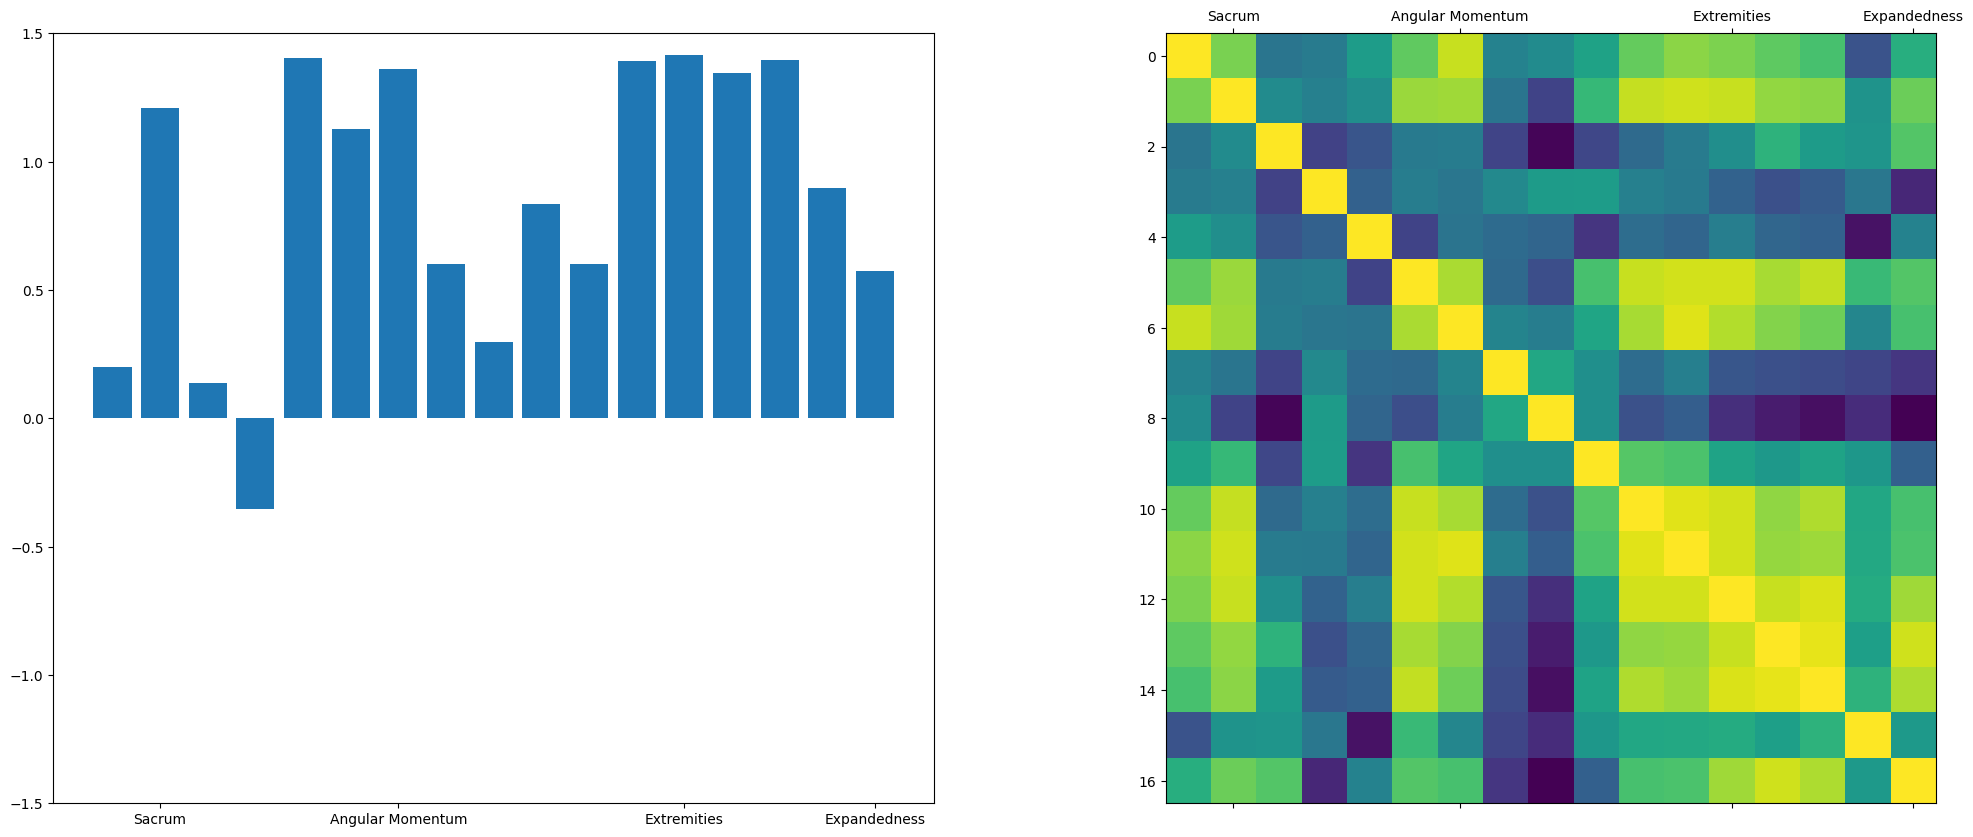

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(25, 10))
axs[0].bar(featuresdf_norm.index, featuresdf_norm['Break'])
axs[1].matshow(dfABreak_scaled.corr())

axs[0].set_ylim([-1.5, 1.5])
axs[0].set_xticks([1, 6, 12, 16])
axs[1].set_xticks([1, 6, 12, 16])
axs[0].set_xticklabels(['Sacrum', 'Angular Momentum', 'Extremities', 'Expandedness'])
axs[1].set_xticklabels(['Sacrum', 'Angular Momentum', 'Extremities', 'Expandedness'])
plt.show

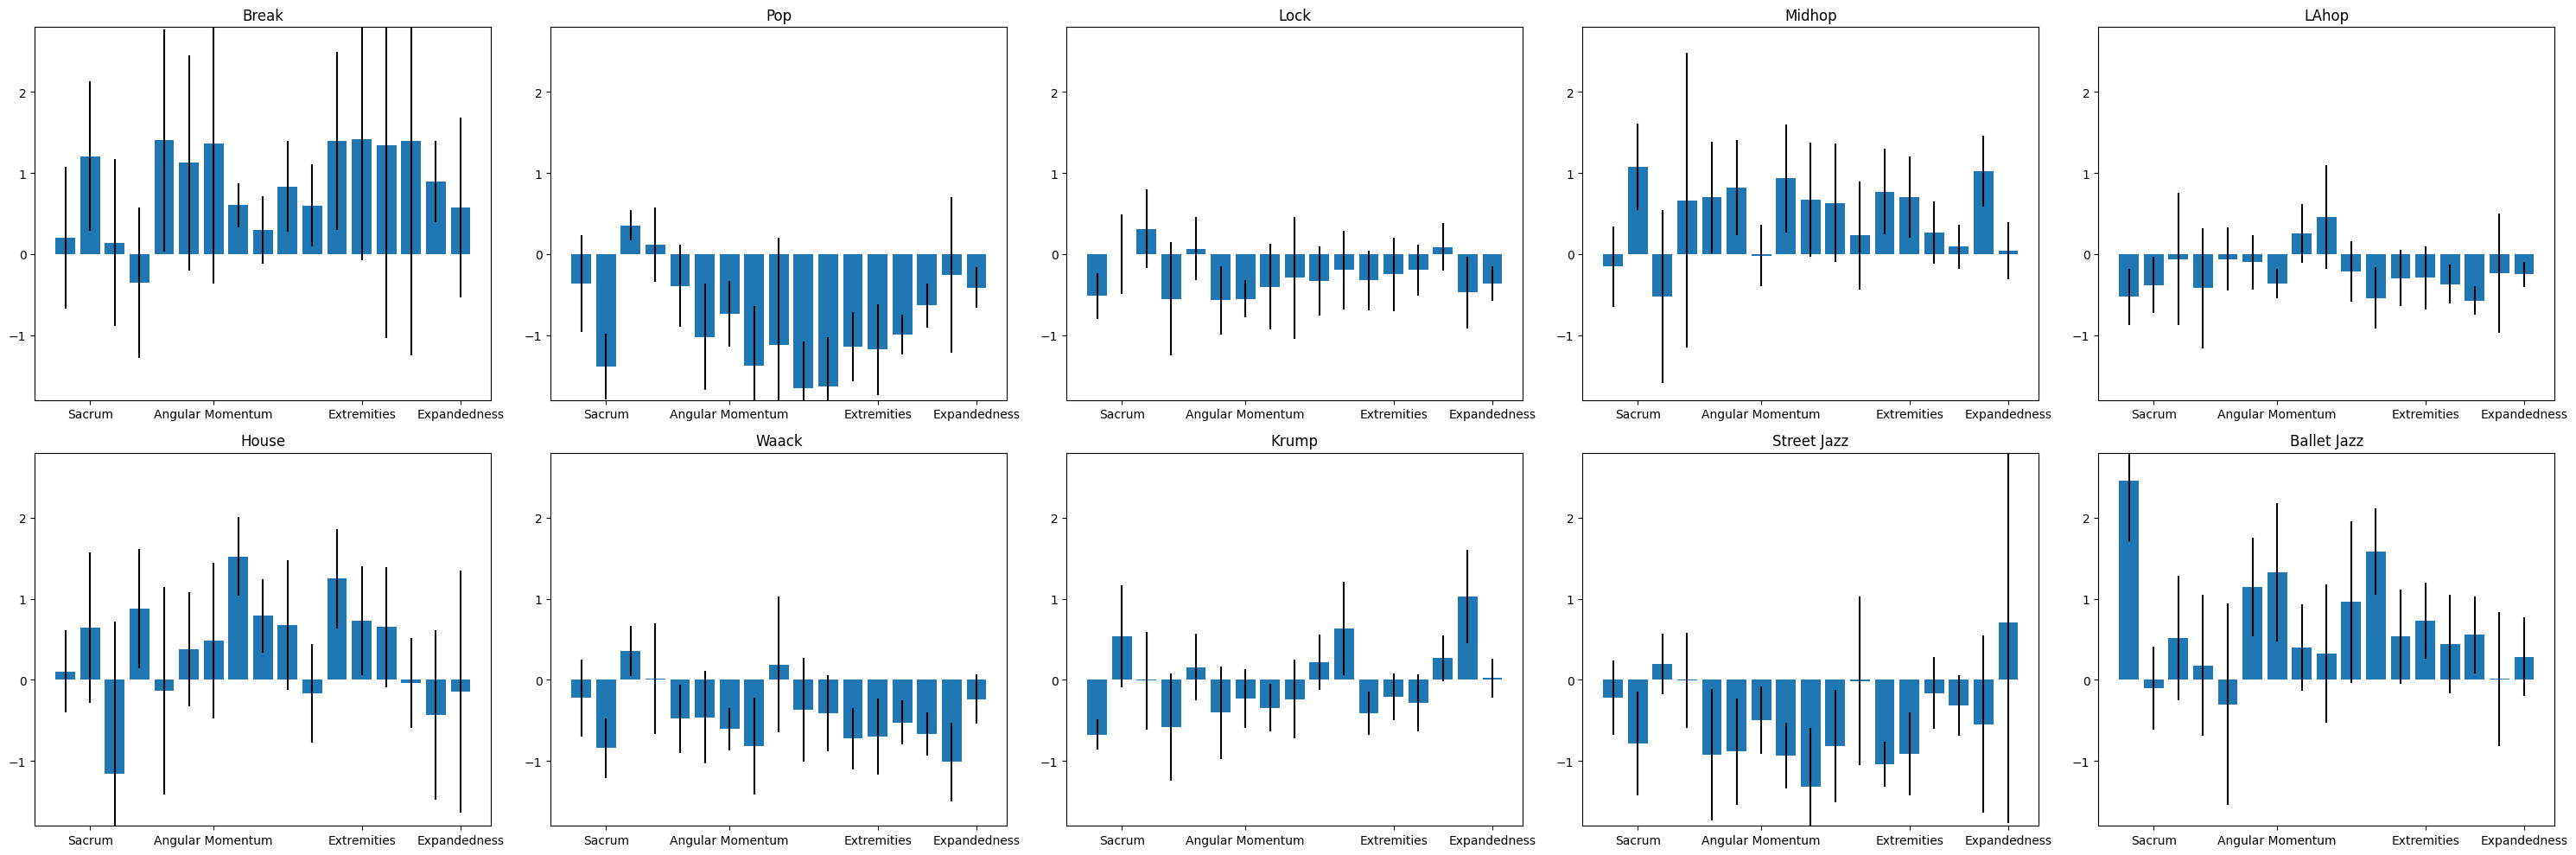

In [19]:
features_mean = dfFM_scaled.groupby('Genre').mean()
features_std = dfFM_scaled.groupby('Genre').std()

# Create subplots
fig, axs = plt.subplots(2, 5, figsize=(30, 10))

for idx, genre in enumerate(genres):
    # Compute row and column indices
    row_idx = idx // 5
    col_idx = idx % 5
    
    # Draw bar plot with error bars
    axs[row_idx, col_idx].bar(features_mean.columns, features_mean.loc[genre], yerr=features_std.loc[genre])
    
    # Set title
    axs[row_idx, col_idx].set_title(genre)

    # Set xticks and xticklabels and ylim
    axs[row_idx, col_idx].set_xticks([1, 6, 12, 16])
    axs[row_idx, col_idx].set_xticklabels(['Sacrum', 'Angular Momentum', 'Extremities', 'Expandedness'])
    axs[row_idx, col_idx].set_ylim([-1.8, 2.8])

# Adjust layout
plt.tight_layout()
plt.show()





/tmp/ipykernel_32/2411097960.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_genre.corr()


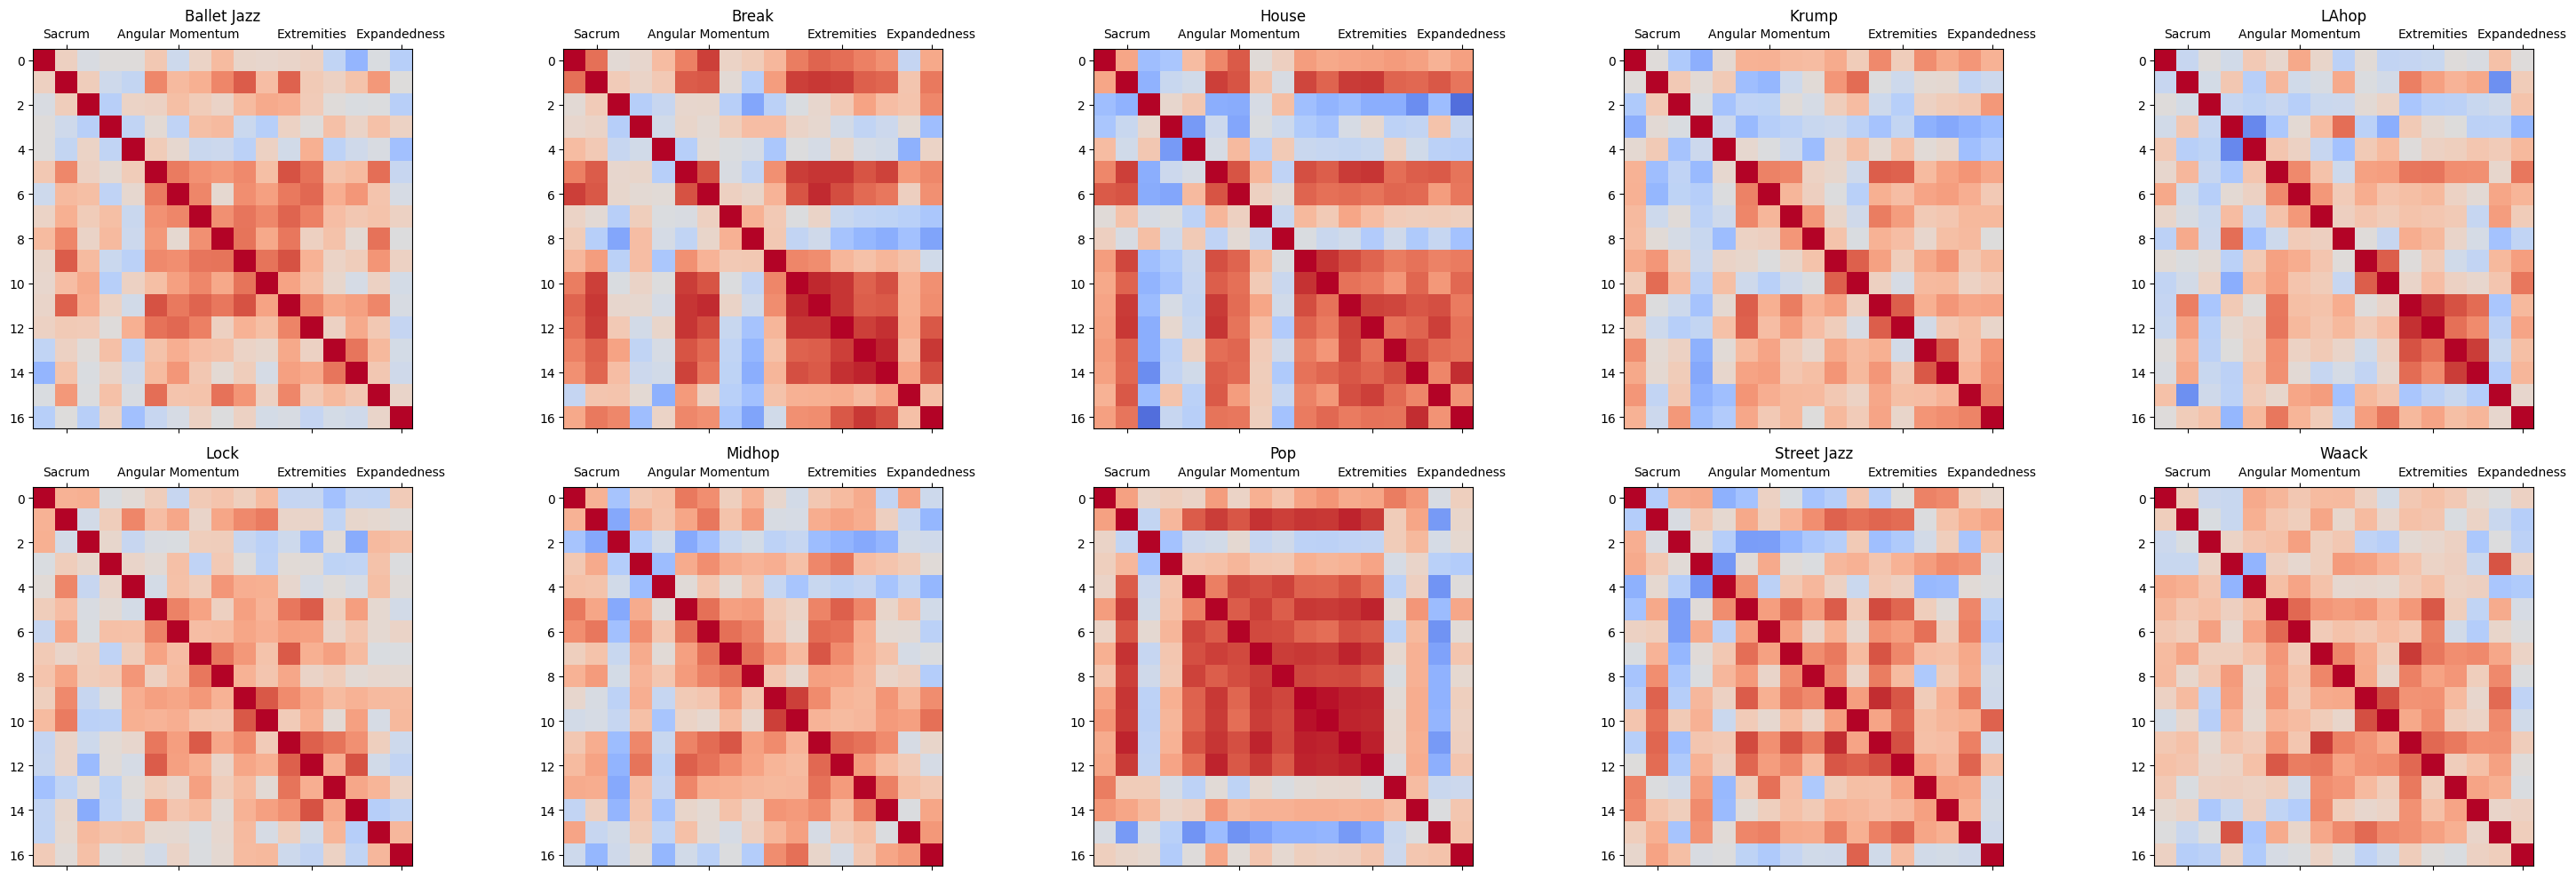

In [22]:
# Create subplots
fig, axs = plt.subplots(2, 5, figsize=(30, 10))

# Plot each correlation matrix
for idx, (genre, df_genre) in enumerate(dfA_genregrouped):
    # Compute row and column indices
    row_idx = idx // 5
    col_idx = idx % 5
    
    # Compute correlation matrix and display it using matshow
    corr_matrix = df_genre.corr()
    cax = axs[row_idx, col_idx].matshow(corr_matrix, vmin=-1, vmax=1, cmap='coolwarm')
    
    # Set title
    axs[row_idx, col_idx].set_title(genre)

    # Set xticks and xticklabels
    axs[row_idx, col_idx].set_xticks([1, 6, 12, 16])
    axs[row_idx, col_idx].set_xticklabels(['Sacrum', 'Angular Momentum', 'Extremities', 'Expandedness'])
    
    
# Adjust layout
plt.tight_layout()
plt.show()


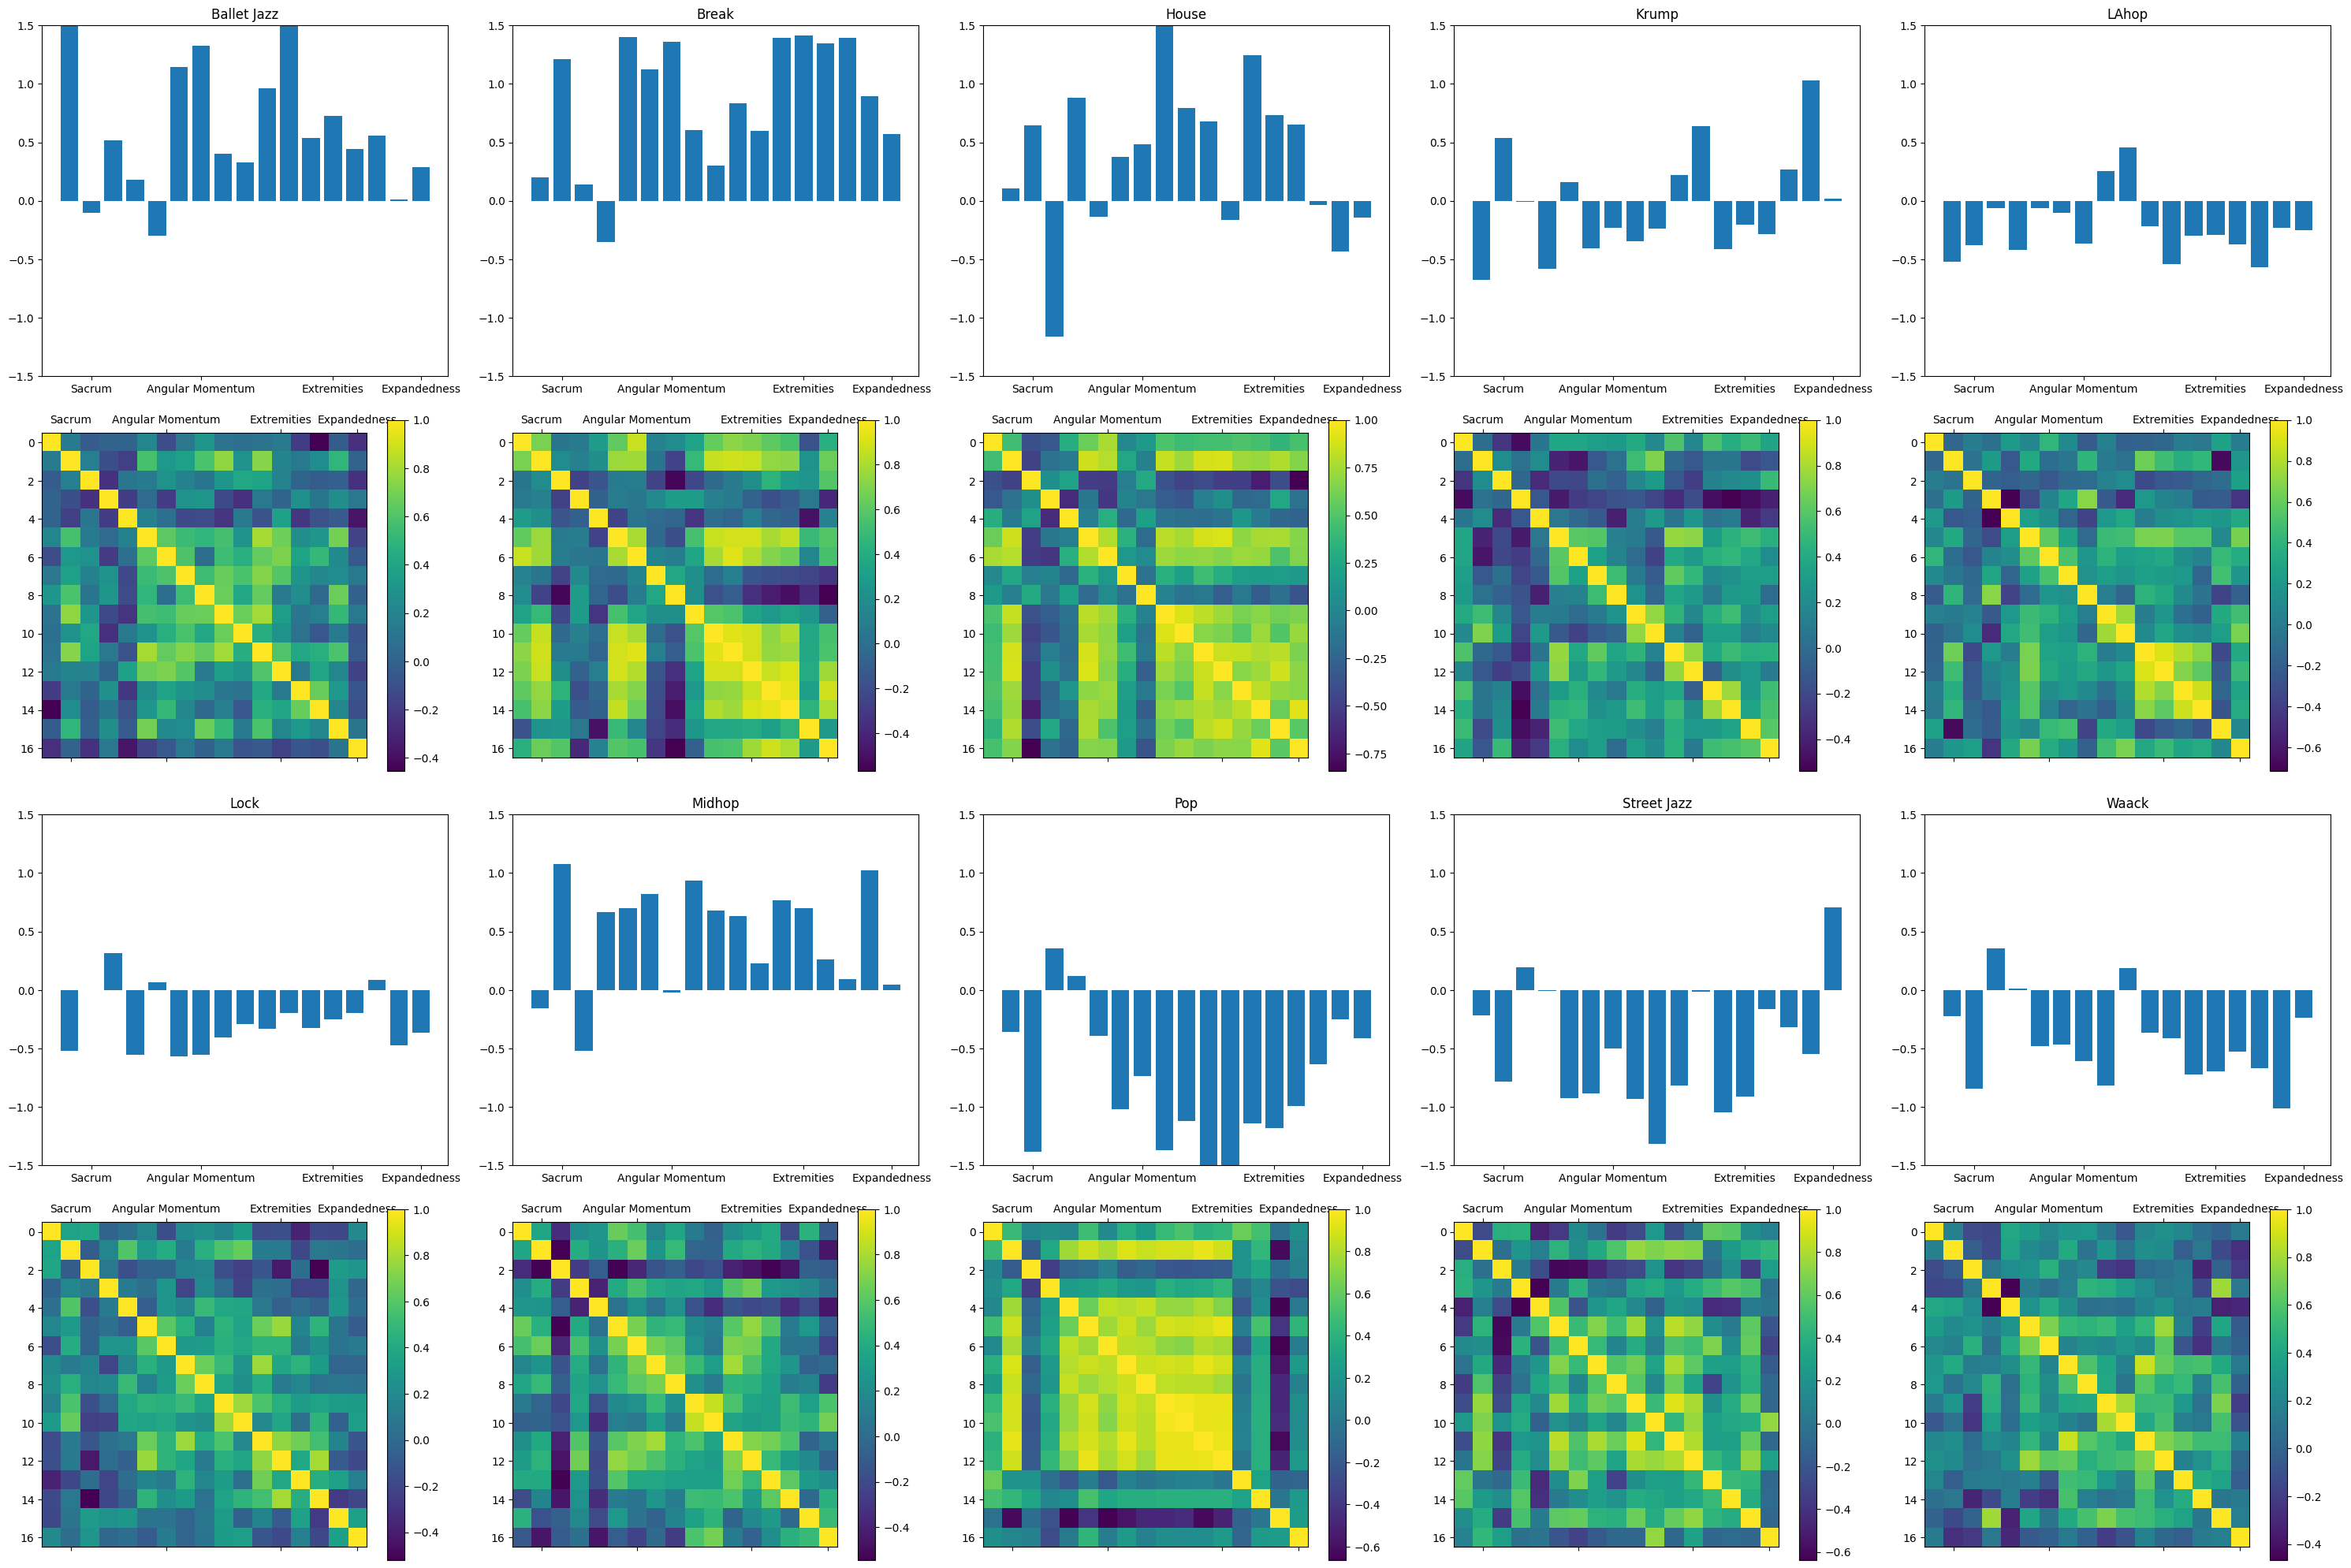

In [30]:
fig, axs = plt.subplots(4, 5, figsize=(30, 20))  # 4 rows (2 pairs of bar plots and correlation matrices), 5 columns (one for each genre)

for idx, (genre, df) in enumerate(dfA_genregrouped):
    df = df.drop(['Genre'], axis=1)  # drop the 'Genre' column

    # Determine the row index for bar plot and correlation matrix
    bar_plot_row_idx = idx // 5 * 2
    corr_plot_row_idx = idx // 5 * 2 + 1

    # Bar plot
    axs[bar_plot_row_idx, idx % 5].bar(featuresdf_norm.index, featuresdf_norm[genre])
    axs[bar_plot_row_idx, idx % 5].set_ylim([-1.5, 1.5])
    axs[bar_plot_row_idx, idx % 5].set_xticks([1, 6, 12, 16])
    axs[bar_plot_row_idx, idx % 5].set_xticklabels(['Sacrum', 'Angular Momentum', 'Extremities', 'Expandedness'])
    axs[bar_plot_row_idx, idx % 5].set_title(f'{genre}')

    # Correlation matrix
    corr = df.corr()
    cax = axs[corr_plot_row_idx, idx % 5].matshow(corr)
    fig.colorbar(cax, ax=axs[corr_plot_row_idx, idx % 5])
    axs[corr_plot_row_idx, idx % 5].set_xticks([1, 6, 12, 16])
    axs[corr_plot_row_idx, idx % 5].set_xticklabels(['Sacrum', 'Angular Momentum', 'Extremities', 'Expandedness'])

plt.tight_layout()
plt.show()




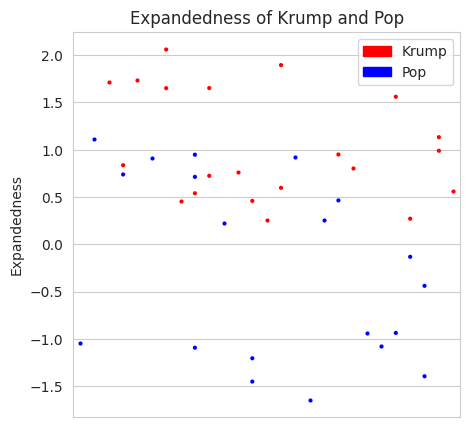

In [15]:
import matplotlib.patches as mpatches
dfAKrump_scaled['Genre_Color'] = 'red'
dfAPop_scaled['Genre_Color'] = 'blue'

# concatenate the Krump and Pop dataframes and add a new column with random integers
df_KrumpPop = pd.concat([dfAKrump_scaled, dfAPop_scaled])
df_KrumpPop['rand'] = np.random.randint(1, len(df_KrumpPop)+1, size=len(df_KrumpPop))

# plot the data using the random integers as x-axis values
fig, ax = plt.subplots(figsize=(5,5))
sns.swarmplot(data=df_KrumpPop[['Expandedness', 'rand', 'Genre_Color']], x='rand', y='Expandedness', hue='Genre_Color', palette=['blue', 'red'], size=3)
plt.title('Expandedness of Krump and Pop')
ax.set(xticklabels=[])
ax.set_xlabel('')

# Create the legend
red_patch = mpatches.Patch(color='red', label='Krump')
blue_patch = mpatches.Patch(color='blue', label='Pop')
plt.legend(handles=[red_patch, blue_patch])
plt.savefig('../plots/feature_plots/ExpandednessswarmKrumpPop.png')
plt.show()
